<a href="https://colab.research.google.com/github/texaschikkita/deep-learning-challenge/blob/main/AlphabetSoupCharity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


#  Import and read the charity_data.csv.
import pandas as pd 
import pandas as pd

# load 50% of the data
# Google Colab crashed trying to load 100%
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv", 
                             nrows=int(0.5 * len(pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"))))


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN","NAME"], axis=1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
17144,T3,CompanySponsored,C1000,Preservation,Trust,1,25000-99999,N,30041,1
17145,T3,Independent,C2000,Preservation,Trust,1,0,N,5000,0
17146,T3,Independent,C2000,Preservation,Trust,1,100000-499999,N,374803,1
17147,T3,CompanySponsored,C1200,Preservation,Trust,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       17149
NAME                      10554
APPLICATION_TYPE             14
AFFILIATION                   6
CLASSIFICATION               47
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    4158
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_values = application_df.loc[:,'APPLICATION_TYPE'].value_counts()
application_values

T3     13822
T6       664
T4       592
T19      459
T8       433
T10      401
T7       375
T5       264
T9        84
T13       33
T12       11
T2         8
T29        2
T25        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_values[application_values<2000].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       13822
Other     3327
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_value = application_df.loc[:, 'CLASSIFICATION'].value_counts()
classification_value

C1000    8885
C2000    2982
C1200    2396
C2100    1136
C3000     580
C7000     420
C1700     174
C4000     117
C5000      68
C2700      67
C7100      47
C1270      46
C2800      30
C1240      18
C7200      18
C1230      14
C1300      14
C1400      13
C2300      13
C7120      12
C8000      11
C1280      11
C8200       9
C1800       7
C1500       7
C7210       6
C6000       6
C1235       5
C1237       5
C1600       4
C1250       4
C4100       3
C1238       3
C2710       2
C1260       2
C1720       2
C1278       2
C1728       1
C2170       1
C4120       1
C1257       1
C8210       1
C2400       1
C4500       1
C1245       1
C2561       1
C1732       1
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_value[classification_value<2000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    8885
C2000    2982
Other    2886
C1200    2396
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)


In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop('IS_SUCCESSFUL', axis=1).values


In [11]:

# Split the preprocessed data into a training and
# testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 1)

In [12]:
application_df = None

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units= 80, input_dim= number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units= 30, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                847200    
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 849,661
Trainable params: 849,661
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [16]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train, epochs=100)

Epoch 1/100
402/402 [==============================] - 8s 16ms/step - loss: 0.5282 - accuracy: 0.7521 - recall: 0.8553
Epoch 2/100
402/402 [==============================] - 8s 19ms/step - loss: 0.1264 - accuracy: 0.9583 - recall: 0.9560
Epoch 3/100
402/402 [==============================] - 5s 14ms/step - loss: 0.0825 - accuracy: 0.9684 - recall: 0.9606
Epoch 4/100
402/402 [==============================] - 7s 17ms/step - loss: 0.0773 - accuracy: 0.9691 - recall: 0.9613
Epoch 5/100
402/402 [==============================] - 6s 15ms/step - loss: 0.0757 - accuracy: 0.9692 - recall: 0.9594
Epoch 6/100
402/402 [==============================] - 6s 16ms/step - loss: 0.0747 - accuracy: 0.9694 - recall: 0.9615
Epoch 7/100
402/402 [==============================] - 6s 16ms/step - loss: 0.0737 - accuracy: 0.9701 - recall: 0.9615
Epoch 8/100
402/402 [==============================] - 5s 13ms/step - loss: 0.0734 - accuracy: 0.9693 - recall: 0.9611
Epoch 9/100
402/402 [===========================

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



134/134 - 1s - loss: 0.7493 - accuracy: 0.6721 - recall: 0.5314 - 1s/epoch - 10ms/step
Loss: 0.749322772026062, Accuracy: 0.6721082329750061


In [18]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Alphabet_Soup_model1.h5')
files.download('/content/Alphabet_Soup_model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

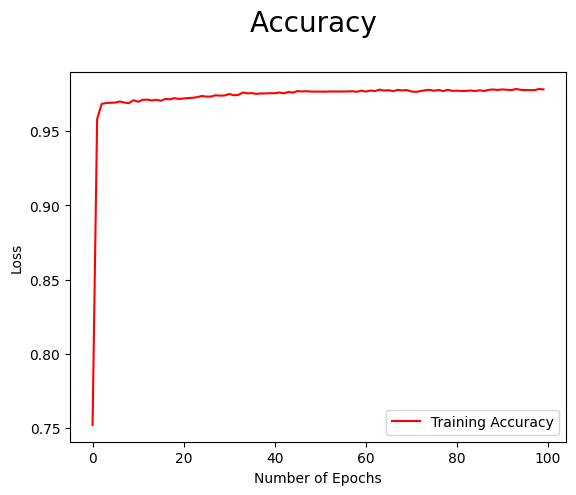

In [19]:
# Model Accuracy Graph
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'red', label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

OPTIMIZATION 1


In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(tf.keras.layers.Dense(units= 160, input_dim= number_input_features, activation='relu'))

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units= 60, activation='relu'))

# Output layer
nn_model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 160)               1694400   
                                                                 
 dense_4 (Dense)             (None, 60)                9660      
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 1,704,121
Trainable params: 1,704,121
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Compile the model
nn_model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [22]:
# Train the model
fit_model2 = nn_model2.fit(X_train_scaled,y_train, epochs=100)l

Epoch 1/100
402/402 [==============================] - 17s 39ms/step - loss: 0.4933 - accuracy: 0.7730 - recall_1: 0.9087
Epoch 2/100
402/402 [==============================] - 14s 34ms/step - loss: 0.1149 - accuracy: 0.9612 - recall_1: 0.9560
Epoch 3/100
402/402 [==============================] - 14s 35ms/step - loss: 0.0822 - accuracy: 0.9681 - recall_1: 0.9602
Epoch 4/100
402/402 [==============================] - 13s 33ms/step - loss: 0.0778 - accuracy: 0.9677 - recall_1: 0.9595
Epoch 5/100
402/402 [==============================] - 15s 37ms/step - loss: 0.0758 - accuracy: 0.9687 - recall_1: 0.9598
Epoch 6/100
402/402 [==============================] - 16s 40ms/step - loss: 0.0751 - accuracy: 0.9692 - recall_1: 0.9605
Epoch 7/100
402/402 [==============================] - 14s 34ms/step - loss: 0.0750 - accuracy: 0.9686 - recall_1: 0.9618
Epoch 8/100
402/402 [==============================] - 12s 31ms/step - loss: 0.0725 - accuracy: 0.9696 - recall_1: 0.9625
Epoch 9/100
402/402 [===

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

134/134 - 1s - loss: 0.8296 - accuracy: 0.7246 - recall_1: 0.6713 - 1s/epoch - 9ms/step
Loss: 0.8296064734458923, Accuracy: 0.7245802283287048


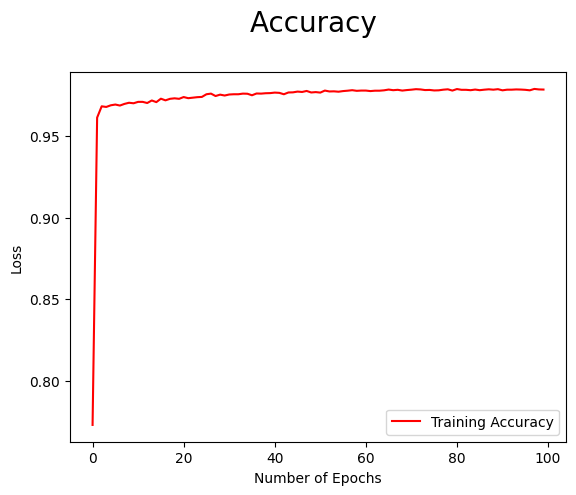

In [24]:
# Model Accuracy Graph
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model2.history['accuracy'], 'red', label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Export our model to HDF5 file
from google.colab import files

nn_model2.save('/content/Alphabet_Soup_model_Optimized.h5')
files.download('/content/Alphabet_Soup_model_Optimized.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OPTIMIZATION 2

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

nn_model3 = tf.keras.models.Sequential()

# First hidden layer
nn_model3.add(tf.keras.layers.Dense(units= 320, input_dim= number_input_features, activation='relu'))

# Second hidden layer
nn_model3.add(tf.keras.layers.Dense(units= 120, activation='relu'))

# Output layer
nn_model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 320)               3388800   
                                                                 
 dense_7 (Dense)             (None, 120)               38520     
                                                                 
 dense_8 (Dense)             (None, 1)                 121       
                                                                 
Total params: 3,427,441
Trainable params: 3,427,441
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Compile the model
nn_model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [34]:
# Train the model
fit_model3 = nn_model3.fit(X_train_scaled,y_train, epochs=100)

Epoch 1/100
402/402 [==============================] - 27s 62ms/step - loss: 0.0543 - accuracy: 0.9787 - recall_3: 0.9717
Epoch 2/100
402/402 [==============================] - 26s 64ms/step - loss: 0.0542 - accuracy: 0.9785 - recall_3: 0.9719
Epoch 3/100
402/402 [==============================] - 24s 59ms/step - loss: 0.0543 - accuracy: 0.9785 - recall_3: 0.9726
Epoch 4/100
402/402 [==============================] - 24s 59ms/step - loss: 0.0542 - accuracy: 0.9784 - recall_3: 0.9715
Epoch 5/100
402/402 [==============================] - 23s 56ms/step - loss: 0.0537 - accuracy: 0.9788 - recall_3: 0.9725
Epoch 6/100
402/402 [==============================] - 25s 61ms/step - loss: 0.0540 - accuracy: 0.9784 - recall_3: 0.9719
Epoch 7/100
402/402 [==============================] - 25s 62ms/step - loss: 0.0532 - accuracy: 0.9791 - recall_3: 0.9721
Epoch 8/100
402/402 [==============================] - 26s 65ms/step - loss: 0.0539 - accuracy: 0.9785 - recall_3: 0.9715
Epoch 9/100
402/402 [===

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

134/134 - 1s - loss: 1.2034 - accuracy: 0.5807 - recall_3: 0.3123 - 1s/epoch - 10ms/step
Loss: 1.2034202814102173, Accuracy: 0.580690324306488


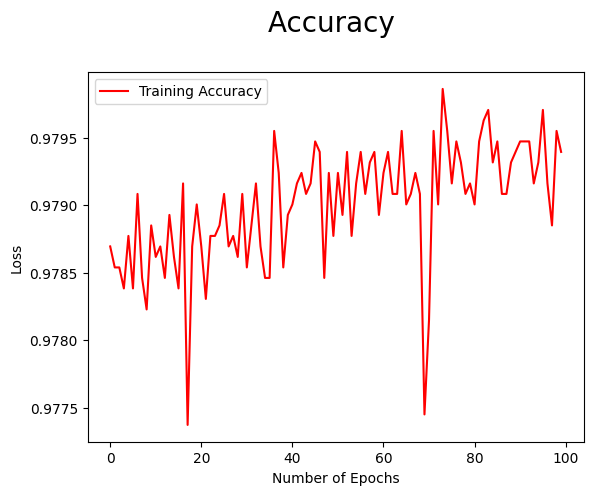

In [37]:
# Model Accuracy Graph
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model3.history['accuracy'], 'red', label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()